Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_sqaured_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import gradio as gr

<h1>Data Cleaning<h1>

In [2]:

# Load dataset
df = pd.read_csv("C:/Users/hpsli/Favorites/Downloads/Sleep_health_and_lifestyle_dataset.csv")


df.head()

# Checking for missing values
df.isnull().sum()

# Handle missing values (impute, drop, or fill)
# Example: Imputing missing values for numeric columns with the mean

# Dropping duplicate records if any
df_cleaned = df.drop_duplicates()

# Print summary of cleaned data
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [3]:
df_cleaned = df.drop(columns=['Person ID'])

# Convert 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder' to categorical variables
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype('category')

# Check for missing values and basic statistics for numeric columns
missing_values = df_cleaned.isnull().sum()
statistics = df_cleaned.describe()
df_numeric = df_cleaned.select_dtypes(include=[float, int])

missing_values, statistics

(Gender                       0
 Age                          0
 Occupation                   0
 Sleep Duration               0
 Quality of Sleep             0
 Physical Activity Level      0
 Stress Level                 0
 BMI Category                 0
 Blood Pressure               0
 Heart Rate                   0
 Daily Steps                  0
 Sleep Disorder             219
 dtype: int64,
               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
 count  374.000000      374.000000        374.000000               374.000000   
 mean    42.184492        7.132086          7.312834                59.171123   
 std      8.673133        0.795657          1.196956                20.830804   
 min     27.000000        5.800000          4.000000                30.000000   
 25%     35.250000        6.400000          6.000000                45.000000   
 50%     43.000000        7.200000          7.000000                60.000000   
 75%     50.000000        7.800000

<h1>Exploratory Data Analysis<h1>

Univariate analysis

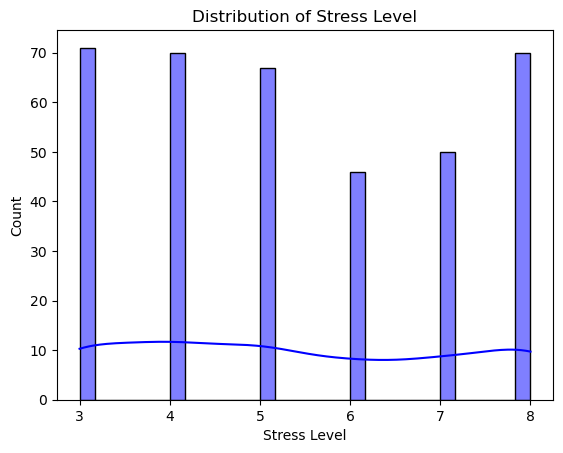

In [5]:
# Distribution of target variable
sns.histplot(df_cleaned['Stress Level'], bins=30, kde=True, color='blue')
plt.title('Distribution of Stress Level')
plt.show()


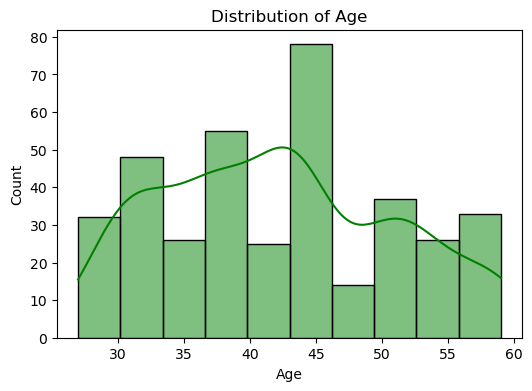

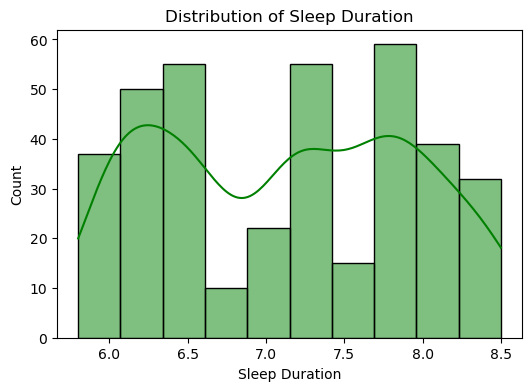

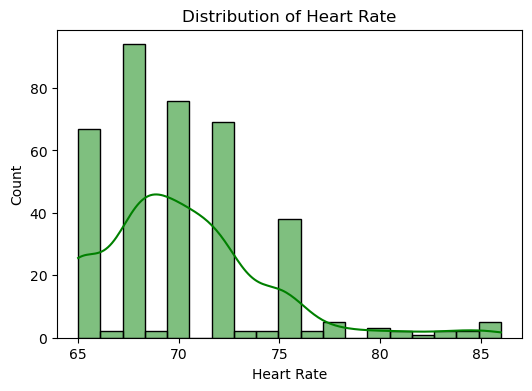

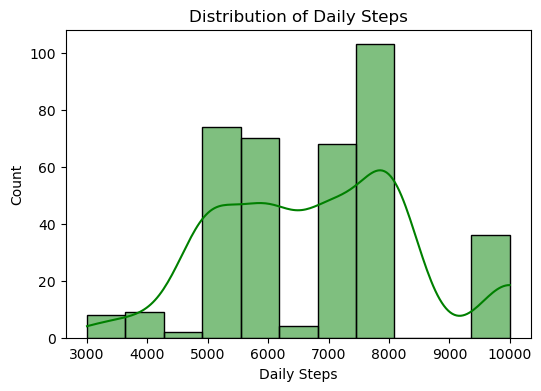

In [6]:
# Plot distribution of continuous features like Age, Sleep Duration, etc.
features = ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[feature], kde=True, color='green')
    plt.title(f'Distribution of {feature}')
    plt.show()


C:\Users\hpsli\AppData\Local\Temp\ipykernel_16948\1151040754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


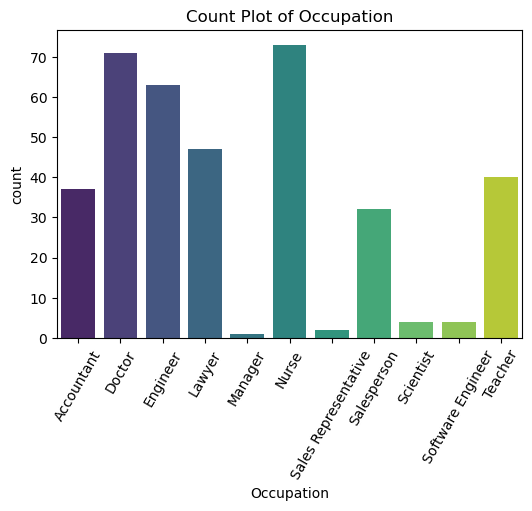

C:\Users\hpsli\AppData\Local\Temp\ipykernel_16948\1151040754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


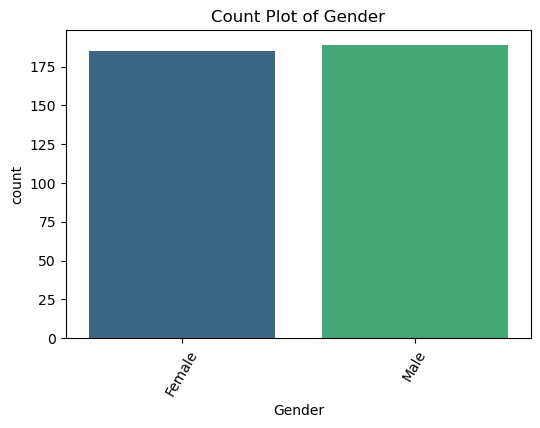

C:\Users\hpsli\AppData\Local\Temp\ipykernel_16948\1151040754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


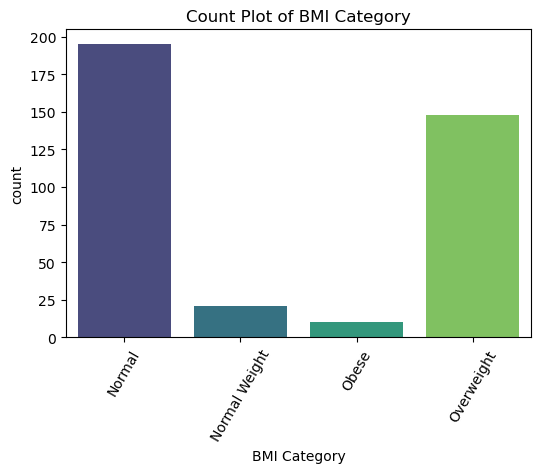

C:\Users\hpsli\AppData\Local\Temp\ipykernel_16948\1151040754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


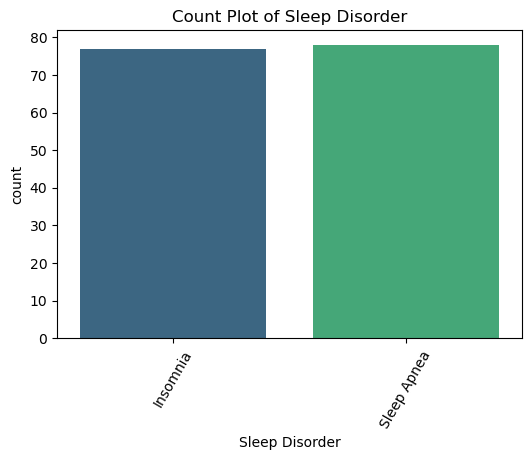

In [7]:
# Plotting the categorical features: Occupation, Gender, etc.
categorical_features = ['Occupation', 'Gender', 'BMI Category', 'Sleep Disorder']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df_cleaned, palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=60)
    plt.show()


Bivariate Analysis

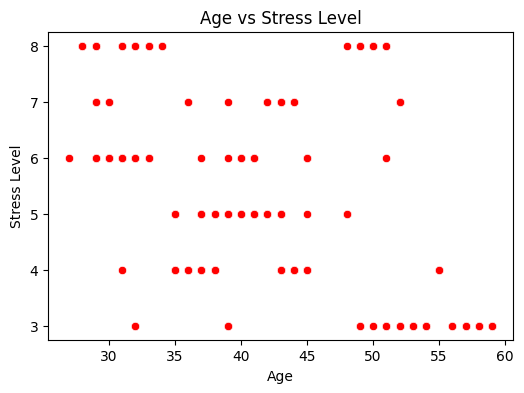

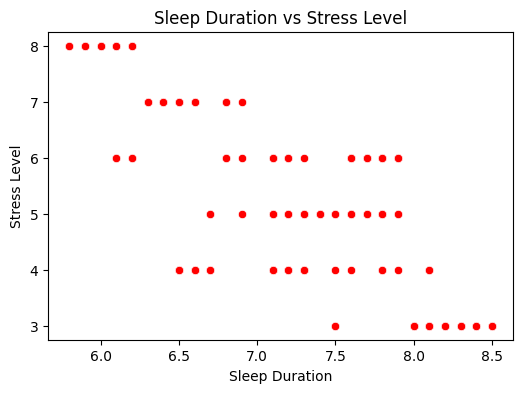

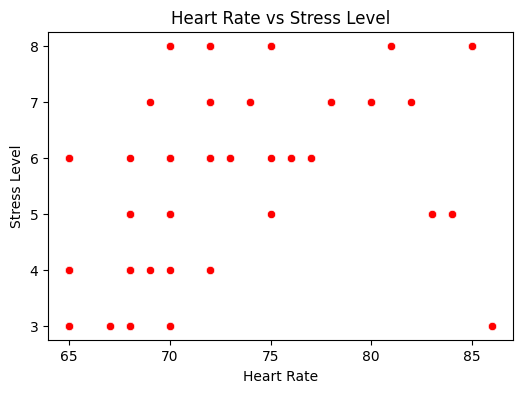

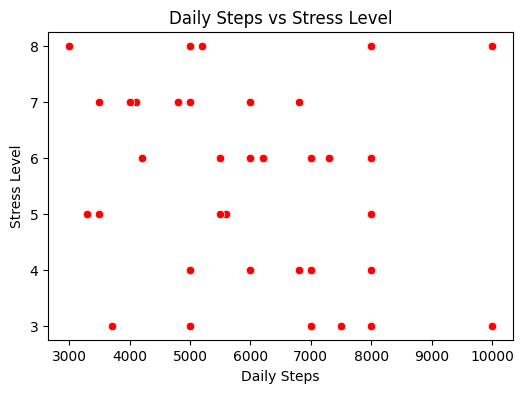

In [8]:
# Scatter plot for continuous features vs. Stress Level
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='Stress Level', data=df_cleaned, color='red')
    plt.title(f'{feature} vs Stress Level')
    plt.show()


C:\Users\hpsli\AppData\Local\Temp\ipykernel_6340\4182940387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')


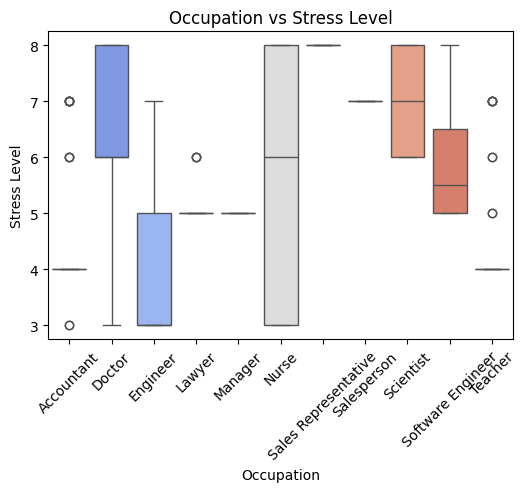

C:\Users\hpsli\AppData\Local\Temp\ipykernel_6340\4182940387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')


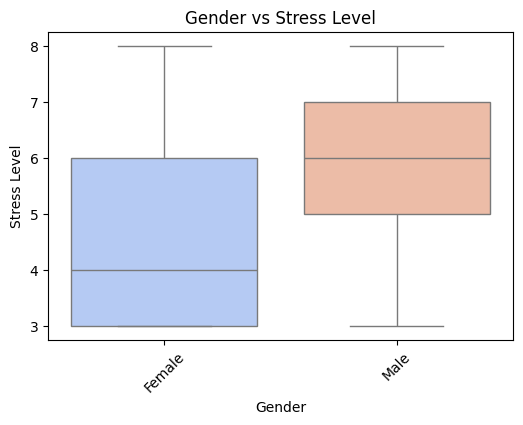

C:\Users\hpsli\AppData\Local\Temp\ipykernel_6340\4182940387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')


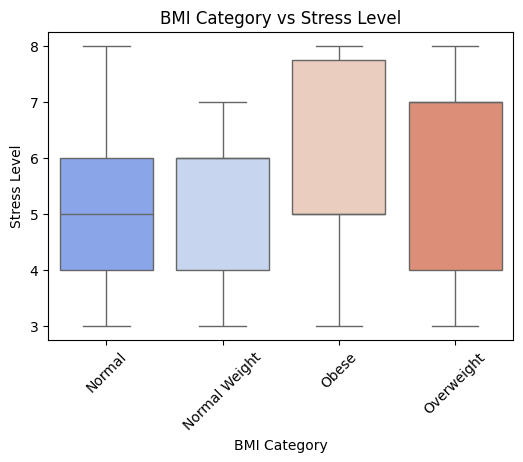

C:\Users\hpsli\AppData\Local\Temp\ipykernel_6340\4182940387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')


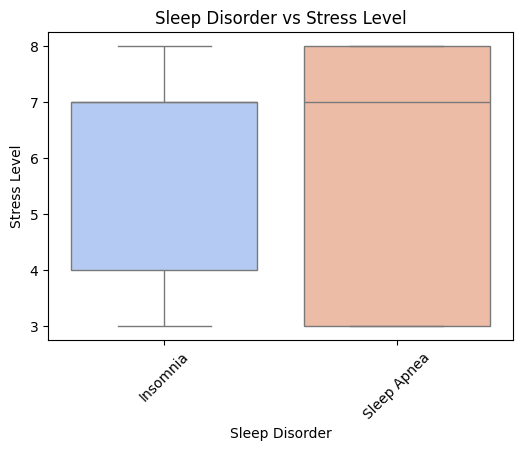

In [9]:
# Boxplot to check distribution of Stress Level across categories
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')
    plt.title(f'{feature} vs Stress Level')
    plt.xticks(rotation=45)
    plt.show()


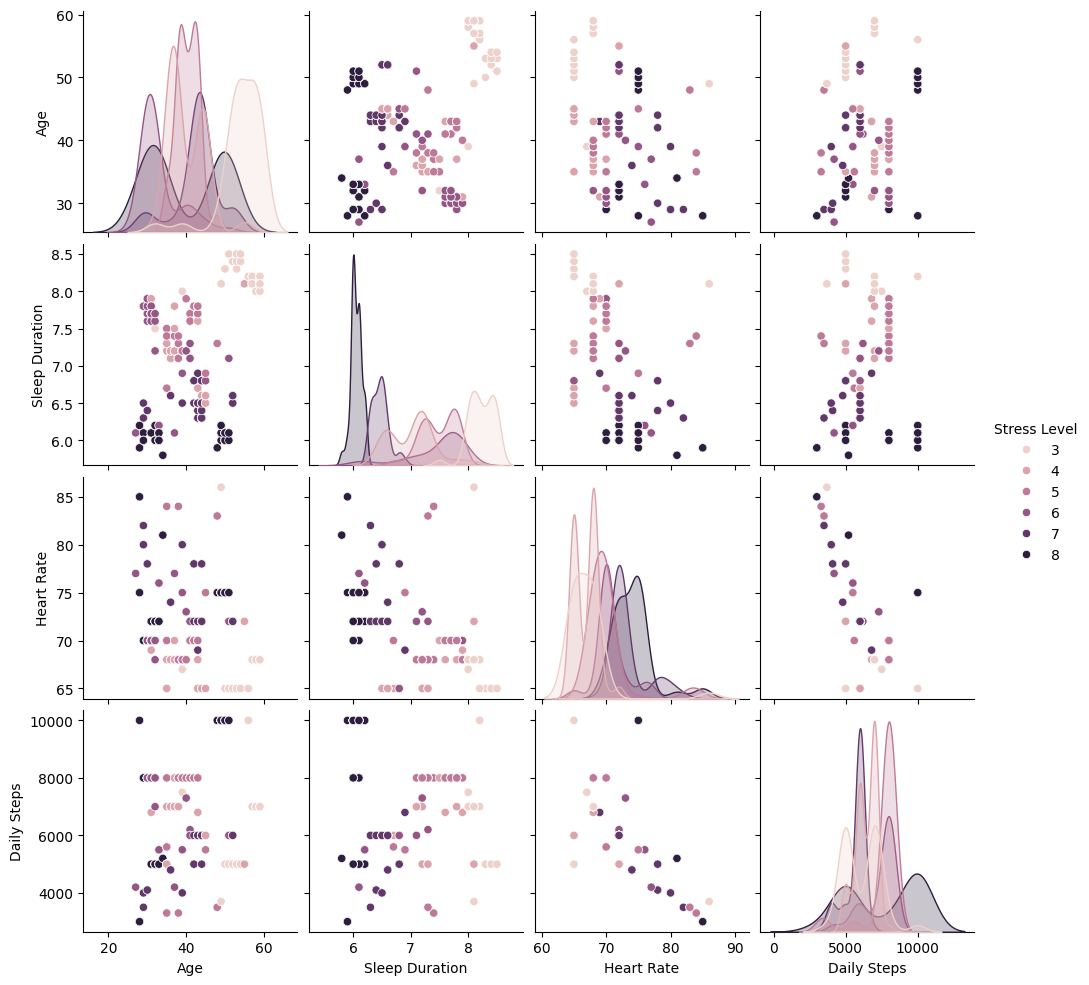

In [10]:
# Pairplot between key variables and stress level
sns.pairplot(df_cleaned, vars=['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'], hue='Stress Level')
plt.show()


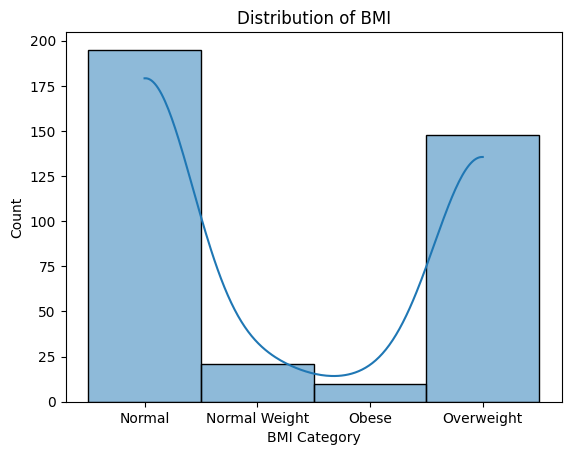

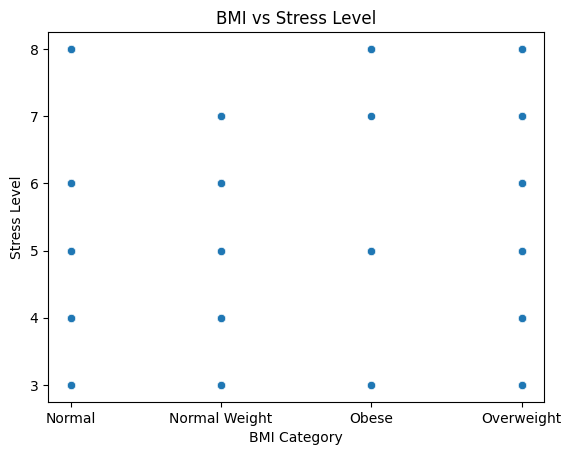

In [11]:
# Example: Creating BMI from weight and height


# Analyzing the new feature (BMI)
sns.histplot(df_cleaned['BMI Category'], kde=True)
plt.title('Distribution of BMI')
plt.show()

# Checking correlation of BMI with Stress Level
sns.scatterplot(x='BMI Category', y='Stress Level', data=df_cleaned)
plt.title('BMI vs Stress Level')
plt.show()


Correlation Analysis

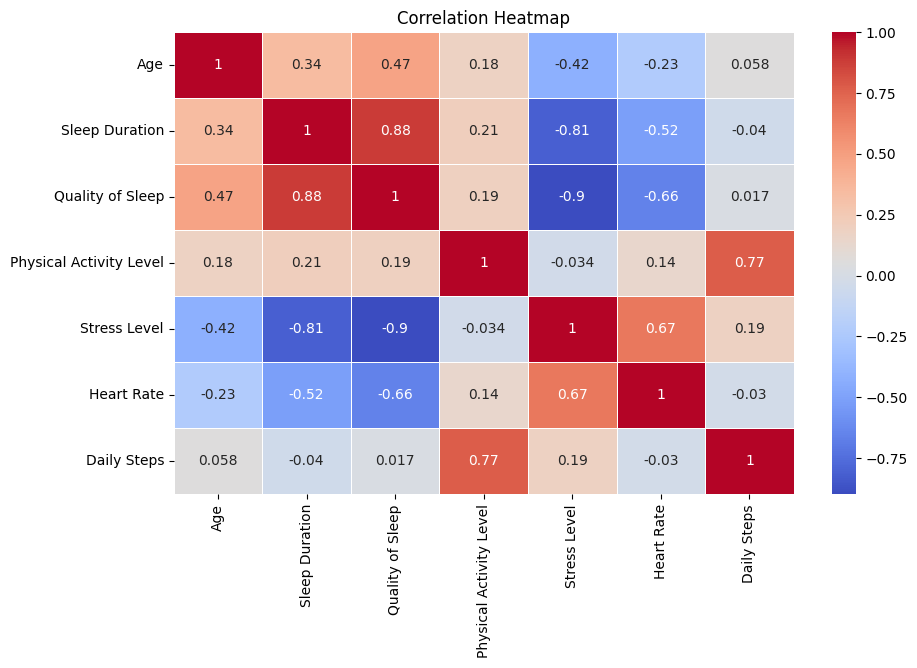

In [12]:
plt.figure(figsize=(10,6))
correlation_matrix = df_numeric.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Multivariate Analysis

In [8]:
import plotly.express as px
fig = px.scatter_3d(df_cleaned, x='Age', y='Physical Activity Level', z='Stress Level', color='Gender')
fig.show()


Outlier Detection


C:\Users\hpsli\AppData\Local\Temp\ipykernel_19704\2277395080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




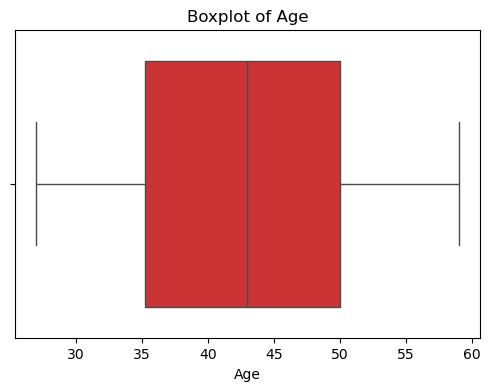

C:\Users\hpsli\AppData\Local\Temp\ipykernel_19704\2277395080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




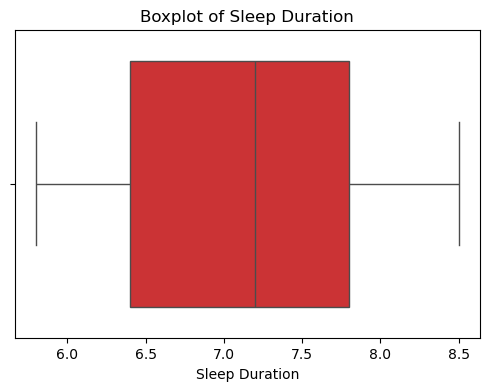

C:\Users\hpsli\AppData\Local\Temp\ipykernel_19704\2277395080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




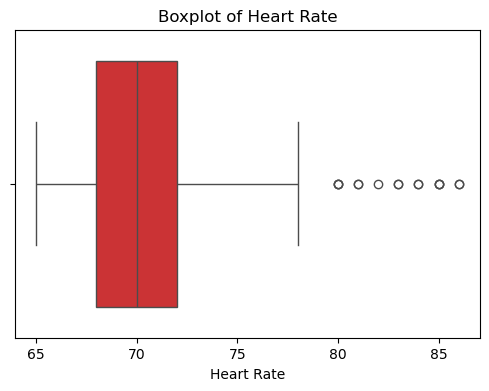

C:\Users\hpsli\AppData\Local\Temp\ipykernel_19704\2277395080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




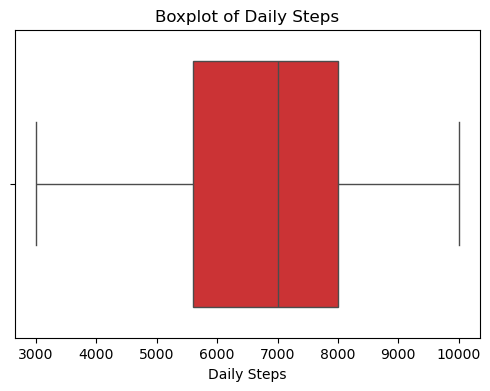

In [11]:
# Boxplot to detect outliers in continuous features
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[feature], palette="Set1")
    plt.title(f'Boxplot of {feature}')
    plt.show()


Categorical Feature Analysis

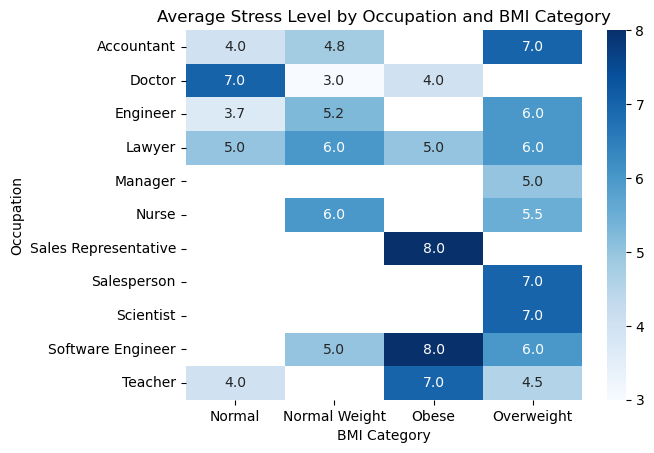

In [12]:
# Heatmap of categorical features using frequency of each combination
pivot = pd.pivot_table(df_cleaned, index='Occupation', columns='BMI Category', values='Stress Level', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".1f")
plt.title('Average Stress Level by Occupation and BMI Category')
plt.show()


Data Preprocessing

In [13]:
# One-hot encode categorical columns (Occupation, Gender, BMI Category, Sleep Disorder)
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)  # Drop first to avoid multicollinearity

# Check the newly created columns after encoding
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Gender_Male                      374 non-null    bool   
 9   Occupation_Doctor                374 non-null    bool   
 10  Occupation_Engineer              374 non-null    bool   
 11  Occupation_Lawyer                374 non-null    bool   
 12  Occupation_Manager    

<h1>Model Training and Deployment <h1>

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import gradio as gr

# Load and prepare the dataset (assuming you have it loaded as df_cleaned)
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)
X = df_encoded.drop(columns=['Stress Level'])
y = df_encoded['Stress Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extract unique occupations from the dataset for the dropdown
unique_occupations = df_cleaned['Occupation'].unique().tolist()
# Define the prediction function
def predict_stress(gender, age, occupation, sleep_duration, quality_of_sleep, activity_level, 
                   bmi_category, systolic_bp, diastolic_bp, heart_rate, daily_steps, sleep_disorder):
    
    # Check if any required input is missing
    if None in [gender, age, occupation, sleep_duration, quality_of_sleep, activity_level, 
                bmi_category, systolic_bp, diastolic_bp, heart_rate, daily_steps, sleep_disorder]:
        return "Error: All fields must be filled out!"

    # Create a data frame with the input features
    input_data = pd.DataFrame({
        'Age': [age],
        'Sleep Duration': [sleep_duration],
        'Quality of Sleep': [quality_of_sleep],
        'Physical Activity Level': [activity_level],
        'Heart Rate': [heart_rate],
        'Daily Steps': [daily_steps],
        'Gender_Male': [1 if gender == "Male" else 0],
        'Systolic_BP': [systolic_bp],
        'Diastolic_BP': [diastolic_bp]
    })
    
    # Handle one-hot encoding dynamically for categorical variables
    for occupation_option in unique_occupations:
        input_data[f"Occupation_{occupation_option}"] = [1 if occupation == occupation_option else 0]
    
    # Add missing columns if not present (important for consistent input data)
    required_columns = X.columns
    for col in required_columns:
        if col not in input_data.columns:
            input_data[col] = 0  # Fill missing columns with 0
    
    # Other categorical variables
    input_data[f'BMI Category_Normal'] = [1 if bmi_category == "Normal" else 0]
    input_data[f'BMI Category_Overweight'] = [1 if bmi_category == "Overweight" else 0]
    input_data[f'BMI Category_Obese'] = [1 if bmi_category == "Obese" else 0]
    
    # Handle blood pressure dynamically
    input_data[f'Blood Pressure_Systolic'] = [systolic_bp]
    input_data[f'Blood Pressure_Diastolic'] = [diastolic_bp]
    
    # Sleep disorder options
    input_data[f'Sleep Disorder_None'] = [1 if sleep_disorder == "None" else 0]
    input_data[f'Sleep Disorder_Sleep Apnea'] = [1 if sleep_disorder == "Sleep Apnea" else 0]
    input_data[f'Sleep Disorder_Insomnia'] = [1 if sleep_disorder == "Insomnia" else 0]

    # Ensure the input data has the same columns as the training data
    input_data = input_data[X.columns]
    
    # Predict the stress level
    prediction = rf_model.predict(input_data)
    stress_level = prediction[0]
    
    # Classify stress level and provide suggestions
    if stress_level > 0.8:
        stress_label = "High"
        suggestion = "Your stress level is high. It's important to take steps to manage your stress, such as practicing relaxation techniques, exercising regularly, or seeking support from a counselor."
    elif stress_level > 0.5:
        stress_label = "Medium"
        suggestion = "Your stress level is moderate. Try incorporating stress-relief activities into your routine, like mindfulness, taking short breaks, or getting adequate sleep."
    else:
        stress_label = "Low"
        suggestion = "Your stress level is low. Keep maintaining a healthy lifestyle, such as regular physical activity and good sleep habits, to stay balanced."

    # Return prediction with the stress level classification and suggestions
    return f"Predicted Stress Level: {stress_label} (Score: {round(stress_level, 2)})\n\nSuggestions: {suggestion}"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_stress,
    inputs=[
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Slider(18, 85, step=1, label="Age"),
        gr.Dropdown(unique_occupations, label="Occupation"),  # Using dynamic list of occupations
        gr.Slider(5.8, 8.5, step=0.1, label="Sleep Duration"),
        gr.Slider(4, 9, step=1, label="Quality of Sleep"),
        gr.Slider(30, 90, step=1, label="Physical Activity Level"),
        gr.Dropdown(["Normal", "Overweight", "Obese"], label="BMI Category"),
        gr.Slider(90, 200, step=1, label="Systolic Blood Pressure"),
        gr.Slider(60, 120, step=1, label="Diastolic Blood Pressure"),
        gr.Slider(65, 86, step=1, label="Heart Rate"),
        gr.Slider(3000, 10000, step=100, label="Daily Steps"),
        gr.Radio(["None", "Sleep Apnea", "Insomnia"], label="Sleep Disorder")
    ],
    outputs="text",
    title="Stress Level Prediction",
    description=(
        "Enter your details to predict your stress level. "
        "You'll also receive personalized suggestions to help you manage stress more effectively."
    )
)

# Launch the Gradio interface
if __name__ == "__main__":
    interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


<h1>Model Evaluation<h1>

In [15]:
from sklearn.metrics import mean_square_error,r2_score, mean_absolute_error

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Root Mean Squared Error (RMSE): 0.1514551638824727
Mean Squared Error (MSE): 0.02293866666666667
Mean Absolute Error (MAE): 0.04266666666666667
R-squared (R2): 0.9926579037214066


Model Evaluation using Stratified K-Fold Cross-Validation

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

X = df_encoded.drop(columns=['Stress Level'])
y = df_encoded['Stress Level']

# Use Stratified K-Fold for evaluation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation and evaluate metrics
mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print(f"Average RMSE: {np.sqrt(np.mean(mse_scores))}")
print(f"Average MAE: {np.mean(mae_scores)}")
print(f"Average R-squared: {np.mean(r2_scores)}")


Average RMSE: 0.2100592966476564
Average MAE: 0.05456360360360359
Average R-squared: 0.9859309900146362
